<h1 style="text-align: center;"> FINAL PROJECT </h1>
<h2 style="text-align: center;"> Dự đoán điểm IT001 từ dữ liệu làm bài trên WECODE </h2>

---

#### Lớp: CS114.P21

#### Thành viên nhóm

1. Nguyễn Chí Cường - 23520199
2. Hứa Mạnh Tân - 23521396
3. Nguyễn Tấn Tài - 23521376

---

## 1. Chuẩn bị dữ liệu và một số thông tin về bộ dữ liệu

### 1.1. Import thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import json

### 1.2. Load bộ dữ liệu

In [2]:
# Đường dẫn đến các tập dữ liệu
WECODE_DATASET = "../dataset/wecode/annonimized.csv"
SCORE_DATASET = "../dataset/wecode/qt-public.csv"

In [3]:
wecode_df = pd.read_csv(WECODE_DATASET).rename(
    columns={
        "concat('it001',`assignment_id`)": "assignment_id",
        "concat('it001',`problem_id`)": "problem_id",
        "concat('it001', username)": "username",
        "concat('it001',`language_id`)": "language_id",
    }
)

score_df = (
    pd.read_csv(SCORE_DATASET)
    .rename(columns={"hash": "username", "diemqt": "score"})
    .replace(r"^\s*$", "", regex=True)
)

### 1.3. Thông tin bộ dữ liệu

#### 1.3.1. Thông tin bộ dữ liệu làm bài tập Wecode của sinh viên

In [4]:
wecode_df.head(10)

,assignment_id,problem_id,username,is_final,status,pre_score,coefficient,language_id,created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
5,90ce27571176d87961b565d5ef4b3de33ede04ac,d6a5bdd7f7f32364f4743854ef3b5369c0706677,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,Compilation Error,0,100,it0012,10-09 09:29:03,10-09 09:30:08,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func..."
6,90ce27571176d87961b565d5ef4b3de33ede04ac,d6a5bdd7f7f32364f4743854ef3b5369c0706677,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:29:58,10-09 09:30:08,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
7,90ce27571176d87961b565d5ef4b3de33ede04ac,8b15ab090e1e8ec3284cf78746d94ffa00bd201b,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,Compilation Error,0,100,it0012,10-09 09:32:17,10-09 09:42:54,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd..."
8,90ce27571176d87961b565d5ef4b3de33ede04ac,8b15ab090e1e8ec3284cf78746d94ffa00bd201b,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,Compilation Error,0,100,it0012,10-09 09:33:36,10-09 09:33:36,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd..."
9,90ce27571176d87961b565d5ef4b3de33ede04ac,8b15ab090e1e8ec3284cf78746d94ffa00bd201b,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,Compilation Error,0,100,it0012,10-09 09:34:05,10-09 09:34:05,"{""times"":[],""mems"":[],""verdicts"":{""\n\nforbidd..."


In [5]:
wecode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295198 entries, 0 to 295197
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   assignment_id  295198 non-null  object
 1   problem_id     295198 non-null  object
 2   username       295198 non-null  object
 3   is_final       295198 non-null  int64 
 4   status         295198 non-null  object
 5   pre_score      295198 non-null  int64 
 6   coefficient    295198 non-null  int64 
 7   language_id    295198 non-null  object
 8   created_at     295198 non-null  object
 9   updated_at     295198 non-null  object
 10  judgement      295198 non-null  object
dtypes: int64(3), object(8)
memory usage: 24.8+ MB


In [6]:
wecode_df.nunique()

assignment_id       203
problem_id          469
username           1489
is_final              2
status                4
pre_score           631
coefficient           4
language_id           6
created_at       284530
updated_at       242976
judgement         58406
dtype: int64

Từ thông tin trên thì ta có thể nhận thấy ngay bộ dữ liệu không hề có cột nào bị bỏ trống (tất cả các cột đều có 295198 giá trị là non-null), nên ta không cần phải xử lí dữ liệu khuyết thiết cho dữ liệu này. 

Những ta dễ thấy, các đặc trưng của dữ liệu này không mang giá trị đánh giá chung về khả năng của sinh viên, mà nó chỉ chứa thông tin về những lần nộp bài wecode của sinh viên một các rời rạc, lẻ tẻ. Vì vậy, chúng cần phải được tổng hợp lại và thay thế bằng những đặc trưng mới có giá trị đánh giá hoạt động học tập của sinh viên (ví dụ: tổng điểm của các bài wecode, số lần thử nộp bài, số bài đã giải, ...). Và từ đó ta có thể xây dựng các mô hình dự đoán điểm quá trình, thực hành và cuối kì dựa trên các đặc trưng mới này hiệu quả hơn.

#### 1.3.2. Thông tin bộ dữ liệu điểm của sinh viên

In [7]:
score_df.head(10)

,username,score
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,7.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,7
2,01122b3ef7e59b84189e65985305f575d6bdf83c,9
3,013de369c439ab0ead8aa7da64423aa395a8be39,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,9
5,0155f91fe242fe55e1af631b0f0afbe9938b185c,9
6,016f87a7bd87f233a8633fba8a1ca7ef5c3c63c1,8
7,017ec1bbad0d598e5a86ac3bd595b870b6456e61,8
8,01ad03ec301749c033155fc17e657cc767d447c8,7
9,020ef1c31cb4751bbfa1a88fba782db3c402e2fa,9


In [8]:
score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  761 non-null    object
 1   score     755 non-null    object
dtypes: object(2)
memory usage: 12.0+ KB


In [9]:
score_df.nunique()

username    761
score        21
dtype: int64

## 2. Trích xuất đặc trưng từ dữ liệu gốc để tạo dữ liệu mới

### 2.1. Trích xuất đặc trưng

Như đã phân tích ở phần 1 thì tập dữ liệu wecode hiện tại không thể được dùng trực tiếp để đánh giá năng lực học tập của sinh viên. Nó là một bản ghi log thông tin các lần nộp bài của sinh viên trên wecode. Do đó, cần phải tổng hợp các đặc trưng hiện tại và trích xuất ra thành các đặt trưng mới có giá trị đánh giá năng lực học tập của sinh viên hơn.

In [10]:
# Bước 1: Tiền xử lý thời gian
wecode_df["created_at"] = pd.to_datetime(
    wecode_df["created_at"], format="%m-%d %H:%M:%S", errors="coerce"
)
wecode_df["updated_at"] = pd.to_datetime(
    wecode_df["updated_at"], format="%m-%d %H:%M:%S", errors="coerce"
)
wecode_df["submit_date"] = wecode_df["created_at"].dt.date

# Bước 2: Thời gian hoạt động mỗi lần nộp (thể hiện số test case đúng được qua các lần nộp)
wecode_df["active_duration"] = (
    wecode_df["updated_at"] - wecode_df["created_at"]
).dt.total_seconds()


# Bước 3: Cờ đánh dấu judgement > 0
def is_judgement_nonzero(j):
    try:
        data = json.loads(j)
        total = sum(sum(v) for v in data.values() if isinstance(v, list))
        return total > 0
    except:
        return False


wecode_df["judgement_nonzero"] = wecode_df["judgement"].apply(is_judgement_nonzero)

# Bước 4: Tính các đặc trưng

# Tổng số lần nộp
submit_counts = wecode_df.groupby("username").size().rename("total_submissions")

# Số problem tham gia
problem_counts = (
    wecode_df.groupby("username")["problem_id"].nunique().rename("num_problems")
)

# Số assignment tham gia
assignment_counts = (
    wecode_df.groupby("username")["assignment_id"].nunique().rename("num_assignments")
)

# Số ngày hoạt động
active_days = (
    wecode_df.groupby("username")["submit_date"].nunique().rename("active_days")
)

# Tính điểm có trọng số cho mỗi lần nộp
wecode_df["weighted_score"] = wecode_df["pre_score"] * wecode_df["coefficient"]
# Tính tổng điểm có trọng số theo username
total_weighted_score = (
    wecode_df.groupby("username")["weighted_score"].sum().rename("total_weighted_score")
)

# Tổng pre_score (ko có hệ số)
total_prescore = (
    wecode_df.groupby("username")["pre_score"].sum().rename("total_prescore")
)

# Số problem với is_final = 1 ( các problem đã làm được đúng hết)
final_problem = (
    wecode_df[wecode_df["is_final"] == 1]
    .groupby("username")["problem_id"]
    .nunique()
    .rename("num_final_problems")
)

# Số problem có pre_score < 10000 ( gồm các prolem đúng hết nhưng trễ hạn và đúng chưa hết )
low_score_problem = (
    wecode_df[wecode_df["pre_score"] < 10000]
    .groupby("username")["problem_id"]
    .nunique()
    .rename("num_low_score_problems")
)

# Tổng số lần nộp có judgement > 0 ( thể hiện đúng được bao nhiêu test case)
nonzero_judgement_submissions = (
    wecode_df[wecode_df["judgement_nonzero"]]
    .groupby("username")
    .size()
    .rename("nonzero_judgement_submissions")
)

# Tổng thời gian hoạt động mỗi ngày (cho mỗi username và ngày cụ thể)
daily_time = wecode_df.groupby(["username", "submit_date"])["active_duration"].sum()
# Sau đó tính trung bình theo từng username (thể hiện sự chăm chỉ)
avg_time_per_day = daily_time.groupby("username").mean().rename("avg_time_per_day")


# Bước 5: Gộp tất cả các đặc trưng
extracted_wecode_df = (
    pd.concat(
        [
            submit_counts,
            problem_counts,
            assignment_counts,
            active_days,
            total_prescore,
            final_problem,
            low_score_problem,
            nonzero_judgement_submissions,
            total_weighted_score,
            avg_time_per_day,
        ],
        axis=1,
    )
    .fillna(0)
    .reset_index()
)

/tmp/ipykernel_365648/1602018708.py:2: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  wecode_df["created_at"] = pd.to_datetime(


### 2.2. Hợp nhất tập dữ liệu điểm và tập dữ liệu wecode để hình thành tập dữ liệu đầy đủ để huấn luyện và kiểm tra mô hình

In [11]:
data_df = pd.merge(
    extracted_wecode_df,
    score_df,
    on="username",
    how="inner",
)
data_df.head(10)

,username,total_submissions,num_problems,num_assignments,active_days,total_prescore,num_final_problems,num_low_score_problems,nonzero_judgement_submissions,total_weighted_score,avg_time_per_day,score
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,147,46,7,14,809110,45.0,27.0,16.0,80911000,8.605200e+04,7.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,259,78,9,20,1421535,78.0,46.0,29.0,142153500,-3.008344e+06,7
2,01122b3ef7e59b84189e65985305f575d6bdf83c,195,66,7,25,1164882,65.0,29.0,34.0,116488200,-8.035625e+05,9
3,013de369c439ab0ead8aa7da64423aa395a8be39,107,52,8,8,692766,52.0,19.0,14.0,68680200,2.461500e+03,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,199,90,9,22,1042765,90.0,45.0,4.0,104276500,-2.287943e+06,9
5,0155f91fe242fe55e1af631b0f0afbe9938b185c,179,46,8,10,836531,46.0,31.0,7.0,82653100,1.736202e+05,9
6,016f87a7bd87f233a8633fba8a1ca7ef5c3c63c1,364,78,10,29,1774884,77.0,54.0,44.0,177488400,-1.655655e+06,8
7,017ec1bbad0d598e5a86ac3bd595b870b6456e61,218,91,11,17,1380711,91.0,39.0,19.0,138071100,1.485365e+04,8
8,01ad03ec301749c033155fc17e657cc767d447c8,271,72,12,24,1404394,72.0,42.0,32.0,140439400,3.868145e+05,7
9,020ef1c31cb4751bbfa1a88fba782db3c402e2fa,175,62,7,23,1175106,62.0,33.0,19.0,117510600,1.562835e+04,9


In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   username                       761 non-null    object 
 1   total_submissions              761 non-null    int64  
 2   num_problems                   761 non-null    int64  
 3   num_assignments                761 non-null    int64  
 4   active_days                    761 non-null    int64  
 5   total_prescore                 761 non-null    int64  
 6   num_final_problems             761 non-null    float64
 7   num_low_score_problems         761 non-null    float64
 8   nonzero_judgement_submissions  761 non-null    float64
 9   total_weighted_score           761 non-null    int64  
 10  avg_time_per_day               761 non-null    float64
 11  score                          755 non-null    object 
dtypes: float64(4), int64(6), object(2)
memory usage: 7

## 3. Phân tích dữ liệu

### Tính toán correlation

/tmp/ipykernel_365648/2403019010.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")


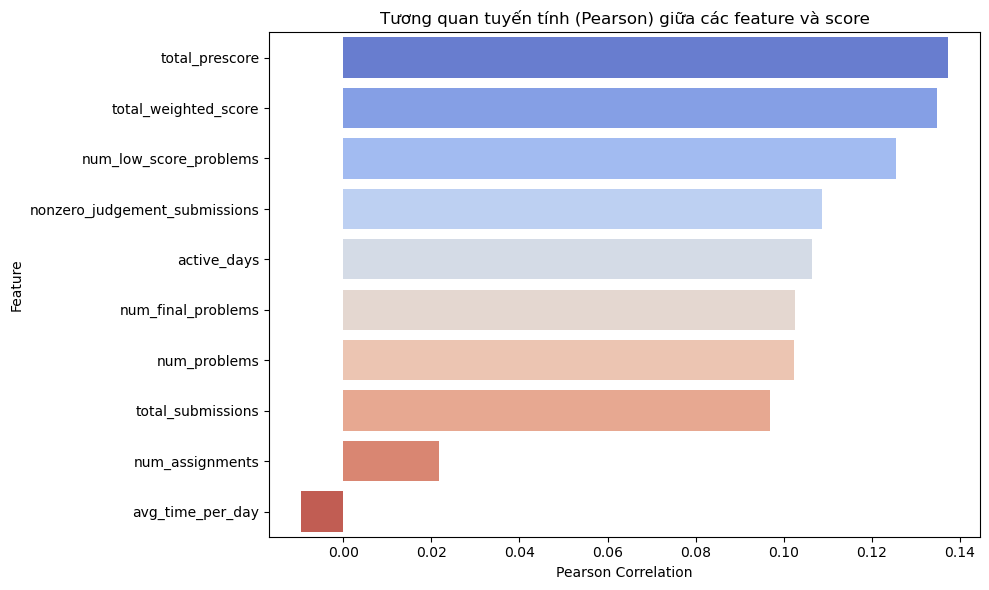

In [13]:
data_df["score"] = pd.to_numeric(data_df["score"], errors="coerce")


corr = (
    data_df.drop(columns=["username", "score"])
    .corrwith(data_df["score"], numeric_only=True)
    .sort_values(ascending=False)
)


plt.figure(figsize=(10, 6))
sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")
plt.title("Tương quan tuyến tính (Pearson) giữa các feature và score")
plt.xlabel("Pearson Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

**Nhận xét**: các correlation có giá trị tuyệt đối > 0.2, nên ta có thể cân nhắc xử dụng Linear Regression trong trường hợp này.

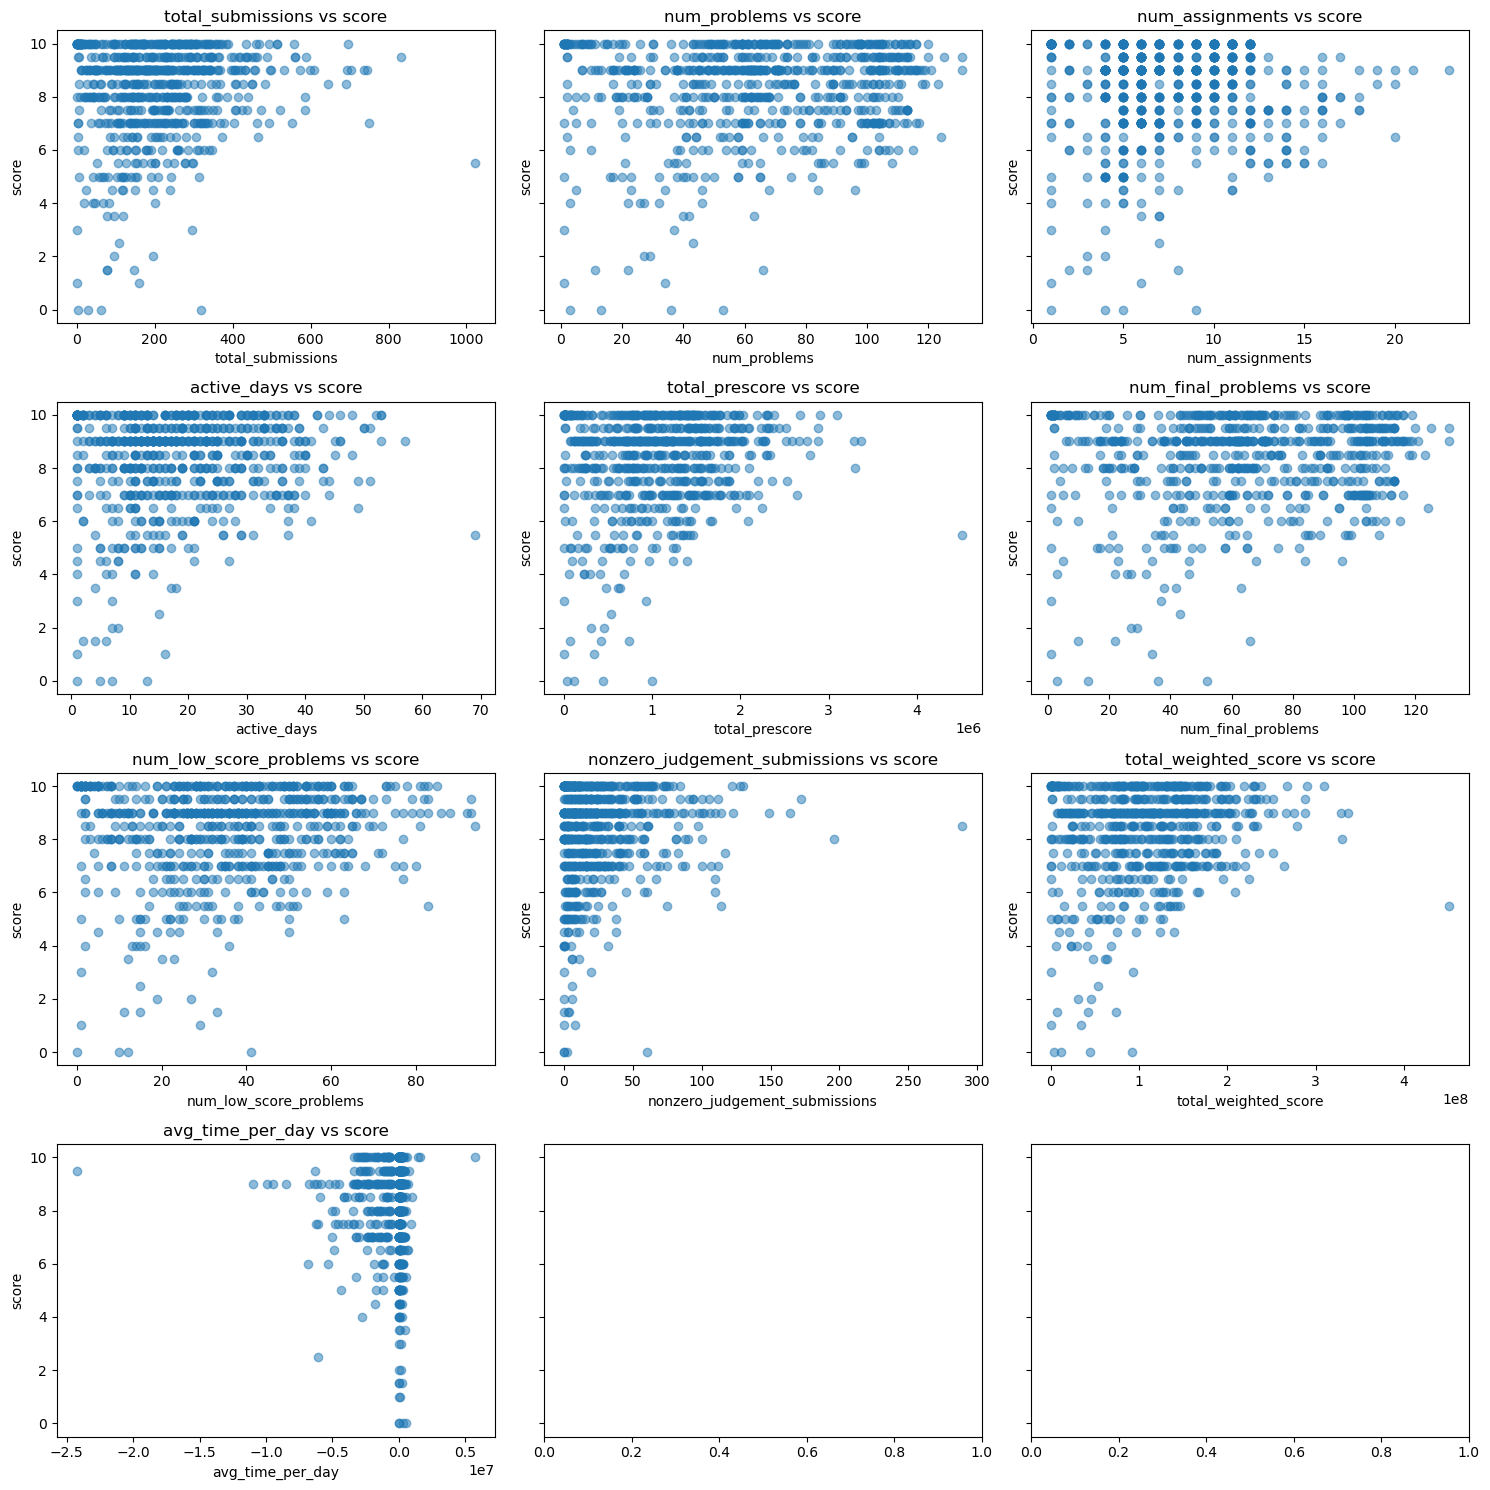

In [14]:
r, c = 4, (len(data_df.columns) - 2) // 3
fig, axes = plt.subplots(
    r,
    c,
    figsize=(15, 15),
    sharey=True,
)

for i, feature_col in enumerate(data_df.columns[1:-1]):
    axes[i // c, i % c].scatter(data_df[feature_col], data_df["score"], alpha=0.5)
    axes[i // c, i % c].set_title(f"{feature_col} vs {"score"}")
    axes[i // c, i % c].set_xlabel(feature_col)
    axes[i // c, i % c].set_ylabel("score")

plt.tight_layout()
plt.show()

## 4. Tiền xử lí dữ liệu

### 4.1. Xử lí dữ liệu khuyết thiếu và tách tập train, test

In [15]:
data_df = data_df.dropna()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 0 to 760
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   username                       754 non-null    object 
 1   total_submissions              754 non-null    int64  
 2   num_problems                   754 non-null    int64  
 3   num_assignments                754 non-null    int64  
 4   active_days                    754 non-null    int64  
 5   total_prescore                 754 non-null    int64  
 6   num_final_problems             754 non-null    float64
 7   num_low_score_problems         754 non-null    float64
 8   nonzero_judgement_submissions  754 non-null    float64
 9   total_weighted_score           754 non-null    int64  
 10  avg_time_per_day               754 non-null    float64
 11  score                          754 non-null    float64
dtypes: float64(5), int64(6), object(1)
memory usage: 76.6+ 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    data_df.drop(columns=["username", "score"]),
    data_df["score"],
    test_size=0.1,
    random_state=42,
)

### 4.2. Xử lí chuẩn hóa dữ liệu

In [17]:
scaler = StandardScaler()

for col in X_train.columns:
    X_train[col] = scaler.fit_transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])
    extracted_wecode_df[col] = scaler.transform(extracted_wecode_df[[col]])

In [18]:
X_train.head(10)

,total_submissions,num_problems,num_assignments,active_days,total_prescore,num_final_problems,num_low_score_problems,nonzero_judgement_submissions,total_weighted_score,avg_time_per_day
685,-0.325048,-0.106749,0.940886,0.537851,-0.033599,-0.102885,0.073134,-0.137562,-0.028498,0.341350
77,-0.446322,-0.167878,0.142487,-0.065753,-0.316557,-0.164048,-0.327551,-0.068193,-0.311624,0.498013
610,0.181447,1.207513,0.940886,1.227683,0.568630,1.212112,0.473818,0.035861,0.574089,-0.187017
73,-1.459313,-1.910040,-1.720444,-1.531647,-1.593506,-1.907183,-1.679860,-0.831253,-1.589333,0.317299
225,-0.852945,-1.451576,-0.922045,-0.928044,-1.005787,-1.448463,-0.928577,-0.831253,-1.001264,0.321453
725,0.160046,1.024128,0.142487,0.020476,0.660413,1.028624,0.724246,-0.484407,0.665928,-3.390284
167,-1.323772,-1.757219,-1.454311,-1.186731,-1.423946,-1.754277,-1.429432,-0.761884,-1.419672,0.364928
64,0.181447,-0.076185,0.142487,-0.238211,0.358118,-0.072304,0.273476,2.255673,0.328486,0.537703
651,0.980426,0.198893,0.674753,1.745058,0.611821,0.202928,0.674160,-0.102877,0.617306,0.356406
271,-1.345173,-1.665526,-1.454311,-1.445418,-1.473855,-1.662533,-1.529604,-0.831253,-1.469610,0.317470


In [19]:
X_test.head(10)

,total_submissions,num_problems,num_assignments,active_days,total_prescore,num_final_problems,num_low_score_problems,nonzero_judgement_submissions,total_weighted_score,avg_time_per_day
593,-0.389252,-0.045621,-0.922045,-0.324440,0.049035,-0.041722,-0.427722,-0.241615,0.054185,0.379243
265,0.359791,1.207513,-0.389779,-0.324440,0.331543,1.181531,1.024759,-0.137562,0.336862,-3.173082
660,2.706792,1.482591,2.803817,2.779806,2.253143,1.487344,1.776042,1.700720,2.259606,-1.432764
78,1.650998,0.107200,0.408620,0.796538,1.358471,0.111184,1.024759,5.932237,1.362449,0.447174
218,-0.660334,0.015508,0.142487,-0.583127,-0.647469,0.019440,-0.427722,-0.623145,-0.642733,0.440212
383,1.729469,1.146385,0.940886,0.968996,1.965284,1.150949,1.826128,1.041713,1.971575,-0.200219
719,1.429852,0.749049,2.271551,0.710309,1.185708,0.722811,0.674160,1.041713,1.191535,0.381811
679,-0.118170,-0.198442,0.940886,-0.151982,-0.042784,-0.194629,0.023048,0.070546,-0.037688,0.388264
411,-0.667468,-0.809727,-0.922045,-0.841814,-0.683817,-0.806255,-0.678149,-0.657830,-0.679103,0.329794
633,0.152912,-0.687470,-0.655912,0.106705,0.148583,-0.683930,-0.477807,-0.206931,0.079001,0.335490


## 5. Huấn luyện mô hình dự đoán

In [20]:
models = {}

### 5.1. Linear Regression

In [21]:
models["Linear Regression"] = LinearRegression()
models["Linear Regression"].fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 5.2. Support Vector Regressor

In [22]:
models["SVR"] = SVR()
models["SVR"].fit(X_train, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


### 5.3. Random Forest Regressor

In [23]:
models["Random Forest"] = RandomForestRegressor()
models["Random Forest"].fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 5.4. XGBoost Regressor

In [24]:
models["XGBoost"] = GradientBoostingRegressor()
models["XGBoost"].fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


## 6. Đánh giá các mô hình

### 6.1. Đánh giá độ chính xác của mô hình thông qua tập test

In [25]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"R^2 of {name}: {r2:.4f}")

R^2 of Linear Regression: -0.0378
R^2 of SVR: 0.1000
R^2 of Random Forest: 0.0982
R^2 of XGBoost: 0.1747


### 6.2. Dự đoán điểm cho toàn bộ sinh viên và lưu kết quả

In [26]:
OUTPUT_DIR = "../output/wecode/"
X = extracted_wecode_df

for name, model in models.items():
    y_pred = model.predict(X.drop(columns=["username"]))
    results_df = pd.DataFrame(
        {
            "username": X["username"],
            "predicted_score": y_pred,
        }
    )
    results_df.to_csv(
        f"{OUTPUT_DIR}{name.replace(' ', '_').lower()}_results.csv", index=False
    )